In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
features = pd.read_csv("../../0_DataPreparation/features.csv")
features

FileNotFoundError: [Errno 2] No such file or directory: '../../0_DataPreparation/features.csv'

<Axes: >

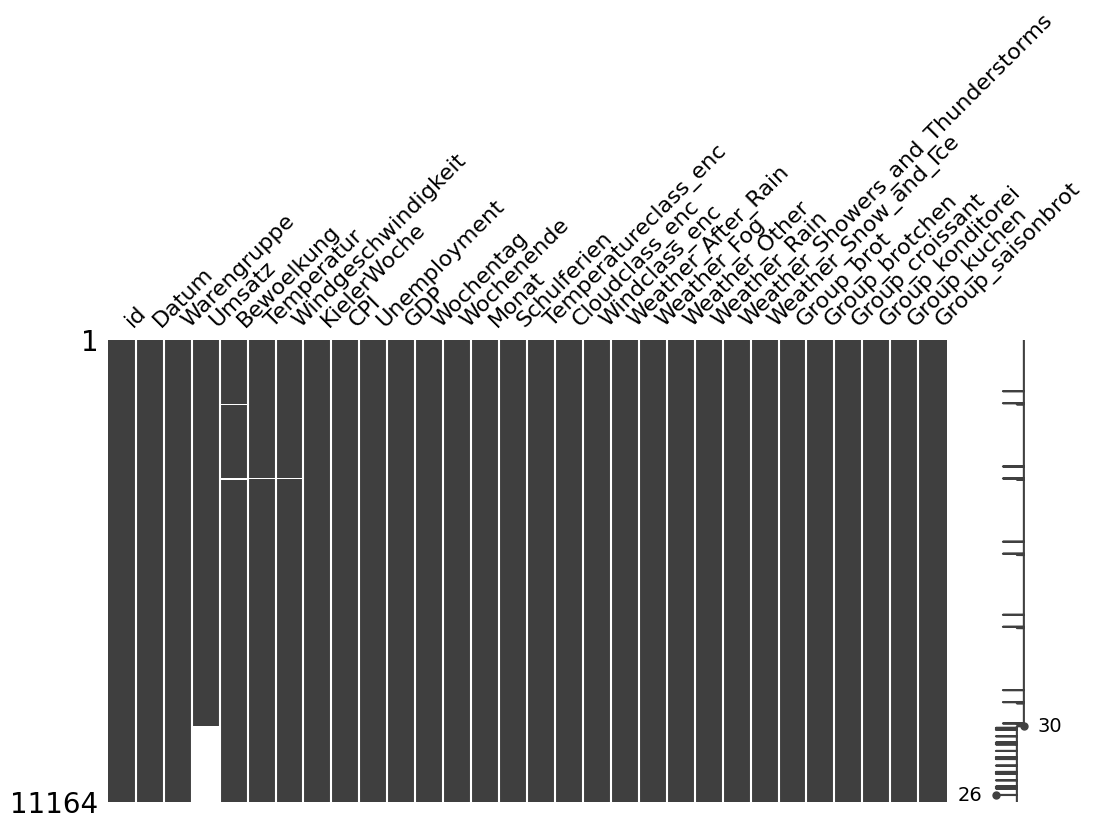

In [ ]:
import missingno as msno

msno.matrix(features, figsize=(12, 6))



In [5]:
# features = features.dropna(subset=['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit'])
# features


from fancyimpute import IterativeImputer, KNN


# nur die Spalten auswählen, die imputet werden sollen
cols_to_impute = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit']

# aus dem vollen df nur diese Spalten extrahieren
subset = features[cols_to_impute]


# KNN-Imputer
imputer_knn = KNN()
imputed_subset = pd.DataFrame(imputer_knn.fit_transform(subset), columns=cols_to_impute)

# dann wieder zurück in den original df schreiben
features[cols_to_impute] = imputed_subset
features


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/11164 with 0 missing, elapsed time: 10.382
Imputing row 101/11164 with 0 missing, elapsed time: 10.382
Imputing row 201/11164 with 0 missing, elapsed time: 10.382
Imputing row 301/11164 with 0 missing, elapsed time: 10.382
Imputing row 401/11164 with 0 missing, elapsed time: 10.383
Imputing row 501/11164 with 0 missing, elapsed time: 10.383
Imputing row 601/11164 with 0 missing, elapsed time: 10.383
Imputing row 701/11164 with 0 missing, elapsed time: 10.383
Imputing row 801/11164 with 0 missing, elapsed time: 10.383
Imputing row 901/11164 with 0 missing, elapsed time: 10.383
Imputing row 1001/11164 with 0 missing, elapsed time: 10.383
Imputing row 1101/11164 with 0 missing, elapsed time: 10.383
Imputing row 1201/11164 with 0 missing, elapsed time: 10.383
Imputing row 1301/11164 with 0 missing, elapsed time: 10.383
Imputing row 1401/11164 with 0 missing, elapsed time: 10.384
Imputing row 1501/11164 with 0 missing, elapsed time: 10.384
Imputing row 1601/11164 with 0 missi

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,KielerWoche,CPI,Unemployment,...,Weather_Other,Weather_Rain,Weather_Showers_and_Thunderstorms,Weather_Snow_and_Ice,Group_brot,Group_brotchen,Group_croissant,Group_konditorei,Group_kuchen,Group_saisonbrot
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,0,93.5,6.8,...,0,0,0,0,1,0,0,0,0,0
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,0,93.5,6.8,...,1,0,0,0,1,0,0,0,0,0
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,0,93.5,6.8,...,0,1,0,0,1,0,0,0,0,0
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,0,93.5,6.8,...,0,0,0,0,1,0,0,0,0,0
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,0,93.5,6.8,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,1812226,2018-12-22,6,NaN,8.0,4.3000,4.0,0,98.5,4.9,...,1,0,0,0,0,0,0,0,0,1
11160,1812236,2018-12-23,6,NaN,7.0,6.4500,9.0,0,98.5,4.9,...,0,1,0,0,0,0,0,0,0,1
11161,1812246,2018-12-24,6,NaN,7.0,2.5000,10.0,0,98.5,4.9,...,0,0,0,0,0,0,0,0,0,1
11162,1812276,2018-12-27,6,NaN,7.0,7.1250,12.0,0,98.5,4.9,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# Separating features and labels
training_features = train_data.drop(['Umsatz','Datum'], axis=1)
validation_features = vali_data.drop(['Umsatz','Datum'], axis=1)
test_features = test_data.drop(['Umsatz','Datum'], axis=1)

training_labels = train_data[['Umsatz']]
validation_labels = vali_data[['Umsatz']]
test_labels = test_data[['Umsatz']]


training_features = training_features.to_numpy().astype(np.float32)
training_labels = training_labels.to_numpy().astype(np.float32)

validation_features = validation_features.to_numpy().astype(np.float32)
validation_labels = validation_labels.to_numpy().astype(np.float32)

# training_labels = training_labels.values.flatten().astype(np.float32)
# validation_labels = validation_labels.values.flatten().astype(np.float32)

training_labels.shape

(7493, 1)

In [11]:


tfmodel = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1, activation='relu')
])

tfmodel.summary()


2025-06-24 17:14:21.042861: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-06-24 17:14:21.043156: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-24 17:14:21.043185: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-24 17:14:21.043406: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-24 17:14:21.043432: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 27)             │           108 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437 (1.71 KB)

 Trainable params: 383 (1.50 KB)

 Non-trainable params: 54 (216.00 B)

In [12]:
tfmodel.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = tfmodel.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20


: 

In [1]:
import numpy as np
import tensorflow as tf


import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"



X_train = np.random.rand(1000, 10).astype(np.float32)
y_train = np.random.rand(1000).astype(np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(10,)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, epochs=5)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Epoch 1/5


: 